Task 1

In [ ]:
!pip install torch torchvision
!pip install git+https://github.com/facebookresearch/maskrcnn-benchmark.git
!pip install opencv-python-headless
!pip install matplotlib
!pip install pycocotools


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import zipfile
import os


zip_path = '/content/bloodcell.zip'


extract_folder = os.path.join(os.getcwd(), 'extracted_images')


if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"Dataset extracted to {extract_folder}.")


Dataset extracted to /content/extracted_images.


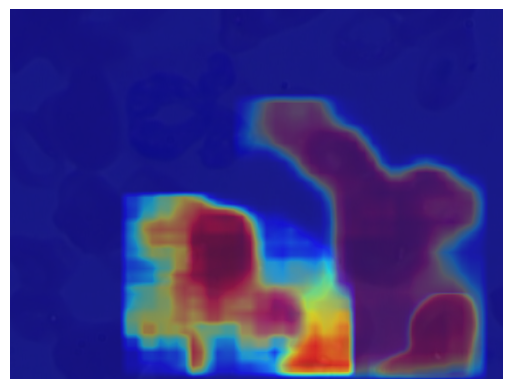

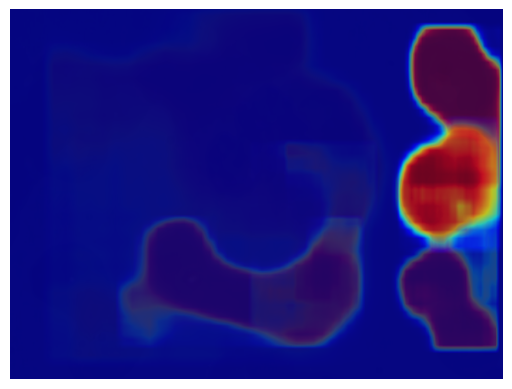

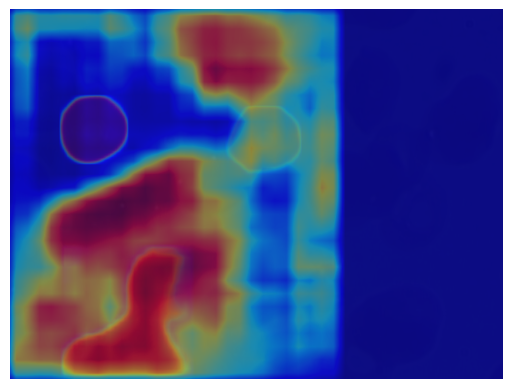

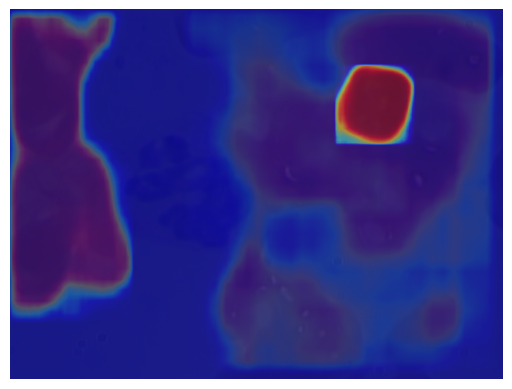

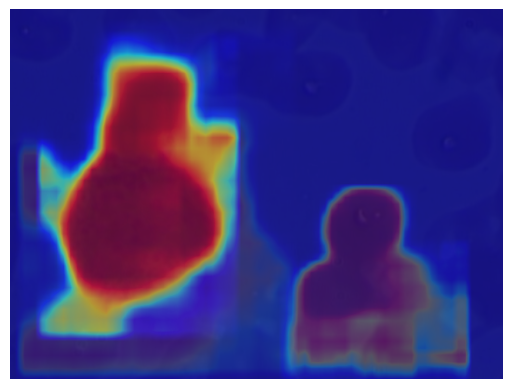

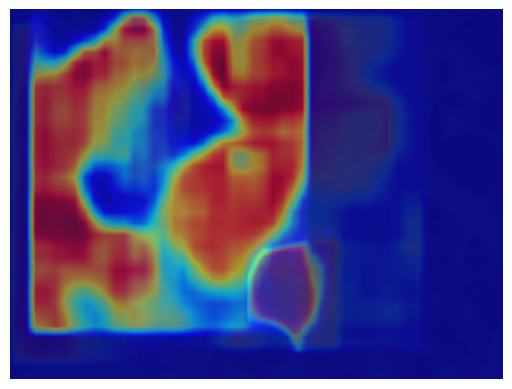

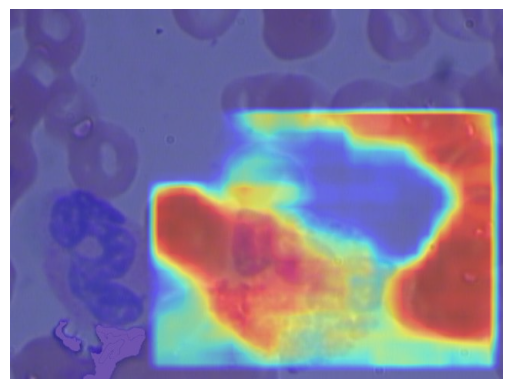

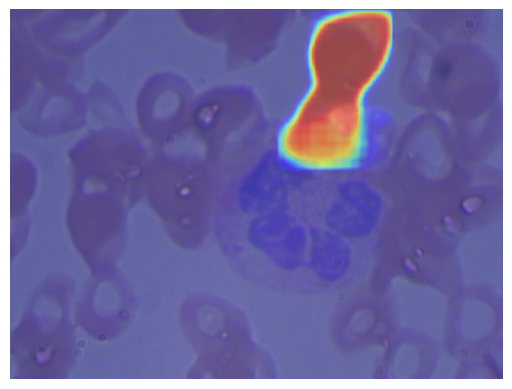

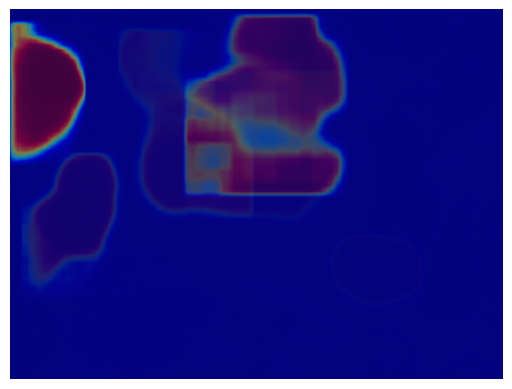

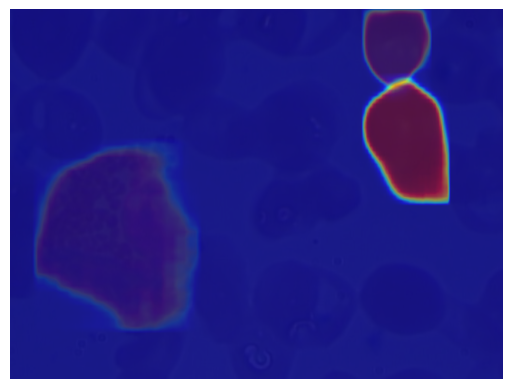

In [ ]:
import torch
import numpy as np
import cv2
from torchvision import models, transforms
import matplotlib.pyplot as plt
from PIL import Image
import os


model = models.detection.maskrcnn_resnet50_fpn(weights=models.detection.MaskRCNN_ResNet50_FPN_Weights.COCO_V1)
model.eval()


transform = transforms.Compose([
    transforms.ToTensor()
])


image_folder = '/content/extracted_images/bloodcell'


image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png'))]
images = [Image.open(os.path.join(image_folder, f)) for f in image_files]


def predict_and_visualize(image):

    image_tensor = transform(image).unsqueeze(0)


    with torch.no_grad():
        prediction = model(image_tensor)


    masks = prediction[0]['masks']
    labels = prediction[0]['labels']
    scores = prediction[0]['scores']


    high_confidence = scores > 0.5


    image_np = np.array(image)


    plt.imshow(image_np)
    ax = plt.gca()

    for idx, mask in enumerate(masks):
        if high_confidence[idx]:

            mask = mask[0, :, :].cpu().numpy()


            ax.imshow(mask, cmap='jet', alpha=0.5)

    plt.axis('off')
    plt.show()


for image in images[:10]:
    predict_and_visualize(image)


Task 2

In [ ]:
!pip install torch torchvision matplotlib


Epoch [1/10], d_loss: 0.2590, g_loss: 3.4779
Epoch [2/10], d_loss: 0.1816, g_loss: 3.0233
Epoch [3/10], d_loss: 0.0152, g_loss: 4.8650
Epoch [4/10], d_loss: 0.0004, g_loss: 8.2342
Epoch [5/10], d_loss: 0.0000, g_loss: 43.3694


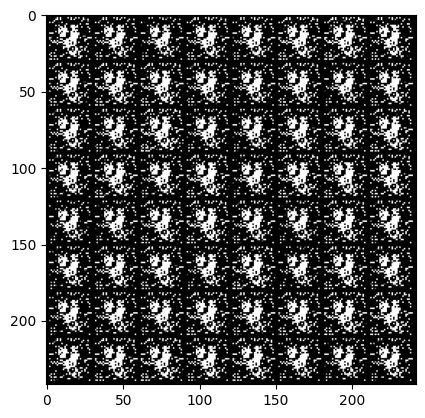

Epoch [6/10], d_loss: 0.0000, g_loss: 42.7403
Epoch [7/10], d_loss: 0.0002, g_loss: 8.5444
Epoch [8/10], d_loss: 0.0000, g_loss: 67.8443
Epoch [9/10], d_loss: 0.0000, g_loss: 67.7704
Epoch [10/10], d_loss: 0.0000, g_loss: 67.7223


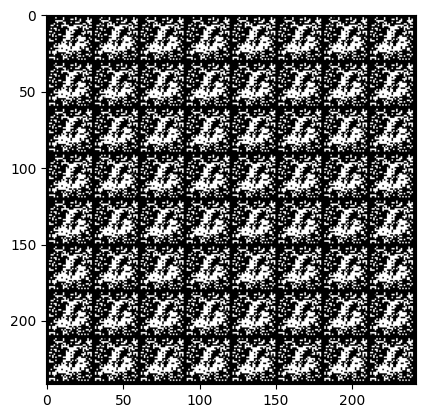

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision.utils as utils


class Generator(nn.Module):
    def __init__(self, z_dim):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(z_dim, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 512)
        self.fc4 = nn.Linear(512, 784)
        self.relu = nn.LeakyReLU(0.2)
        self.tanh = nn.Tanh()

    def forward(self, z):
        z = self.relu(self.fc1(z))
        z = self.relu(self.fc2(z))
        z = self.relu(self.fc3(z))
        z = self.tanh(self.fc4(z))
        return z


class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 1)
        self.relu = nn.LeakyReLU(0.2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x


z_dim = 100
generator = Generator(z_dim)
discriminator = Discriminator()


criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))


transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)


num_epochs = 10
for epoch in range(num_epochs):
    for batch_idx, (real_images, _) in enumerate(train_loader):

        real_images = real_images.view(real_images.size(0), -1)


        real_labels = torch.ones(real_images.size(0), 1)
        fake_labels = torch.zeros(real_images.size(0), 1)


        optimizer_d.zero_grad()


        real_output = discriminator(real_images)
        real_loss = criterion(real_output, real_labels)


        z = torch.randn(real_images.size(0), z_dim)
        fake_images = generator(z)
        fake_output = discriminator(fake_images.detach())
        fake_loss = criterion(fake_output, fake_labels)


        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_d.step()


        optimizer_g.zero_grad()


        fake_output = discriminator(fake_images)
        g_loss = criterion(fake_output, real_labels)


        g_loss.backward()
        optimizer_g.step()


    print(f"Epoch [{epoch+1}/{num_epochs}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}")


    if (epoch + 1) % 5 == 0:
        z = torch.randn(64, z_dim)
        fake_images = generator(z)
        fake_images = fake_images.view(fake_images.size(0), 1, 28, 28)


        grid = utils.make_grid(fake_images, nrow=8, normalize=True)
        plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
        plt.show()
